# CA MMP Backlog Analysis

*Author: Nicole Lin*

using MMP overview data from CIWQS

data download date: 2021-08-25

source: https://ciwqs.waterboards.ca.gov/ciwqs/readOnly/CiwqsReportServlet?reportID=7329136&reportName=MMPReport&inCommand=reset


In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# read MMP aggregate data from CIWQS
oak_dir = '/Users/hongjinl/sherlock_oak'
data_dir = os.path.join(oak_dir, 'EPA', 'Data', 'manual', 'california')

dfs = []
for y in range(2000, 2022): 
    df = pd.read_csv(os.path.join(data_dir, f"MMP_Overview_{y}.csv"))
    df['year'] = y
    dfs.append(df)

data = pd.concat(dfs)
data = data[data['Region'] != 'Totals']
data.head()

,Region,Agency,Facility,WDID,MMP Exempt Violations,Serious Reporting Violations,Serious Effluent Violations,Chronic Violations,Violations w/ MMP Enforcement,Violations Fully Resolved (Paid and Historical),Violations w/o MMP Enforcement,Total MMP Violations,year
0,1,Arcata City,Arcata City WWTF,1B82114OHUM,0,0,11,22,33,0,0,33,2000
1,1,Ferndale City,Ferndale City POTW,1B83136OHUM,0,0,1,3,4,1,0,4,2000
2,1,Forestville Water District,Forestville Water District,1B83100OSON,0,0,10,11,21,21,0,21,2000
3,1,Fort Bragg City,Fort Bragg City WWTP,1B84083OMEN,0,0,12,19,31,0,0,31,2000
4,1,Fortuna City,Fortuna City WWTP,1B83135OHUM,0,0,7,2,9,9,0,9,2000


## State level aggregate

- violation counts by year
- enforcement rate by year (completed by 2021)

In [140]:
totals = data.groupby(['year']).sum()
totals = totals.reset_index()
totals['enforcement_rate'] = [row['Violations w/ MMP Enforcement']/row['Total MMP Violations'] for index, row in totals.iterrows()]
totals['resolve_rate'] = [row['Violations Fully Resolved (Paid and Historical)']/row['Total MMP Violations'] for index, row in totals.iterrows()]

facility_count = data.groupby(['year'])['Facility'].count()

In [141]:
totals

,year,MMP Exempt Violations,Serious Reporting Violations,Serious Effluent Violations,Chronic Violations,Violations w/ MMP Enforcement,Violations Fully Resolved (Paid and Historical),Violations w/o MMP Enforcement,Total MMP Violations,enforcement_rate,resolve_rate
0,2000,277,0,703,1630,2326,2228,7,2333,0.997000,0.954994
1,2001,474,0,744,1483,2219,2082,8,2227,0.996408,0.934890
2,2002,450,0,992,1542,2530,2457,4,2534,0.998421,0.969613
3,2003,846,0,751,1636,2381,2273,6,2387,0.997486,0.952241
4,2004,723,102,744,1326,2170,2135,2,2172,0.999079,0.982965
5,2005,1187,227,639,1350,2215,2197,1,2216,0.999549,0.991426
6,2006,1084,420,966,1764,3150,3008,0,3150,1.000000,0.954921
7,2007,551,532,1173,1045,2745,2594,5,2750,0.998182,0.943273
8,2008,1221,303,1134,1082,2512,1847,7,2519,0.997221,0.733227
9,2009,1847,104,689,923,1713,1380,3,1716,0.998252,0.804196


In [142]:
def plot_count(df, col):    
    plt.title(col)
    plt.plot(df.year, df[col])
    plt.axvline(x=2010, linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('Violation Count')
    plt.show()

def plot_rate(df, col):
    plt.title(col)
    plt.plot(df.year, df[col])
    # the Water Boards implemented a 18-month window for MMP enforcement since 2011
    plt.axvline(x=2019, linestyle='--')
    plt.axhline(y=df[df.year == 2019][col].values[0], linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('Rate')
    plt.show()

As of 2010, the Water Boards had addressed 100% of backlogged MMPs.


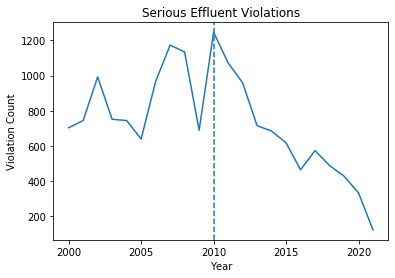

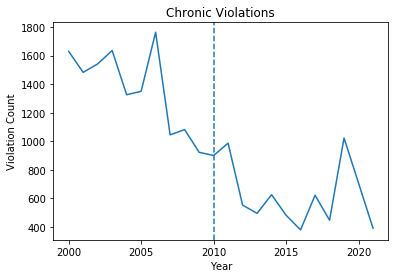

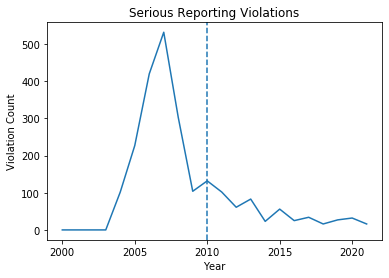

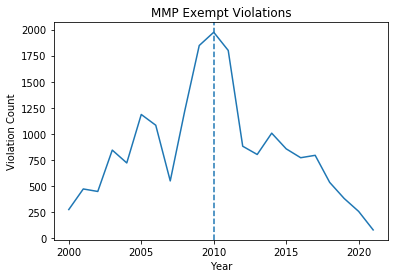

In [143]:
lst = ['Serious Effluent Violations', 'Chronic Violations', 'Serious Reporting Violations', 'MMP Exempt Violations']

print('As of 2010, the Water Boards had addressed 100% of backlogged MMPs.')

for col in lst: 
    plot_count(totals, col)

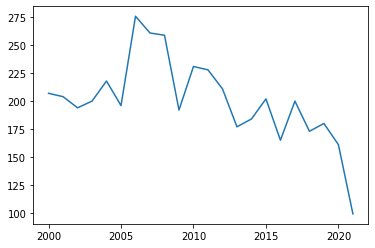

In [144]:
plt.plot(facility_count)
plt.show()

Since 2010, the Water Boards implemented a 18-month window for MMP enforcement.
The MMP enforcement rate for 2019 (about 18 months before now as of Aug 2021) is about 60%.
The MMP resolve rate (MMP paid and ACL historical) for 2019 is about 40%.
As of 2021, MMP enforcement rate reached 90% in 2016 - there seems to be a 5 years delay in practice.


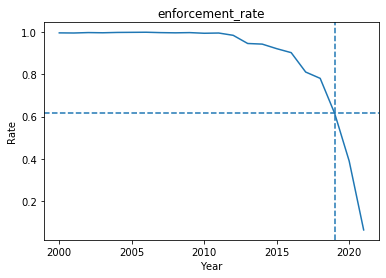

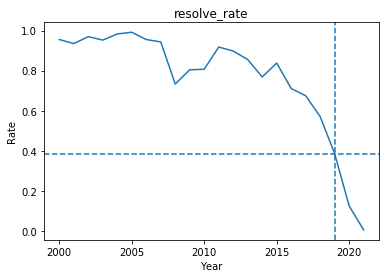

In [145]:
print('Since 2010, the Water Boards implemented a 18-month window for MMP enforcement.')
print('The MMP enforcement rate for 2019 (about 18 months before now as of Aug 2021) is about 60%.')
print('The MMP resolve rate (MMP paid and ACL historical) for 2019 is about 40%.')
print('As of 2021, MMP enforcement rate reached 90% in 2016 - there seems to be a 5 years delay in practice.')

plot_rate(totals, 'enforcement_rate')
plot_rate(totals, 'resolve_rate')

## Regional level aggregate 

- violation counts by region and year
- enforcement rates by region and year

In [146]:
totals = data.groupby(['Region', 'year']).sum()
totals = totals.reset_index()
totals = totals[totals['Total MMP Violations'] != 0]
totals['enforcement_rate'] = [row['Violations w/ MMP Enforcement']/row['Total MMP Violations'] for index, row in totals.iterrows()]
totals['resolve_rate'] = [row['Violations Fully Resolved (Paid and Historical)']/row['Total MMP Violations'] for index, row in totals.iterrows()]

In [147]:
totals.Region.unique().tolist()

['1', '2', '3', '4', '5F', '5R', '5S', '6A', '6B', '7', '8', '9']

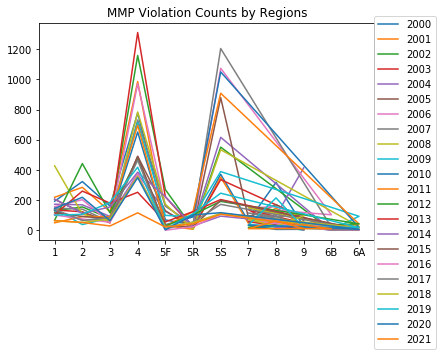

In [148]:
# compare violation counts between regions 
years = totals.year.unique().tolist()
for y in years: 
    y_totals = totals[totals['year'] == y]
    plt.plot(y_totals.Region, y_totals['Total MMP Violations'])
plt.legend(years, loc = (1,-0.5))
plt.title('MMP Violation Counts by Regions')
plt.show()

As of 2010, the Water Boards had addressed 100% of backlogged MMPs.
Region 1:


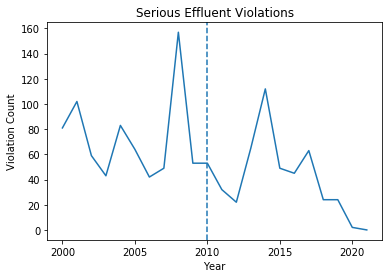

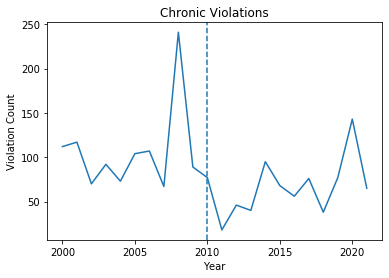

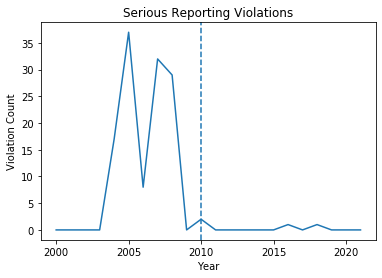

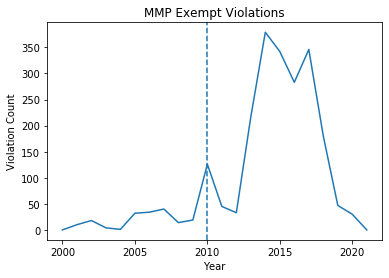

Region 2:


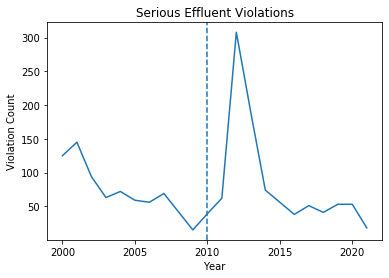

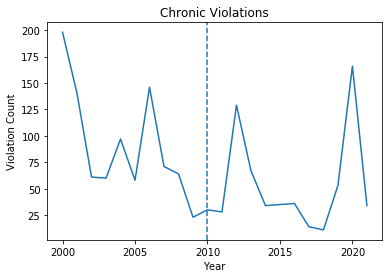

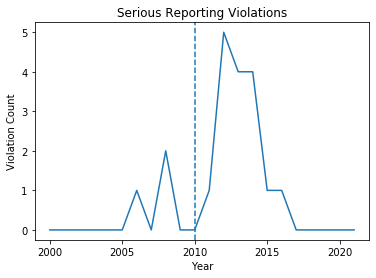

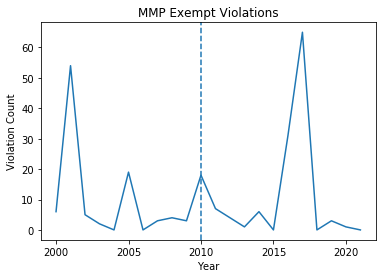

Region 3:


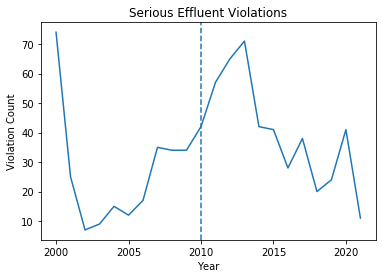

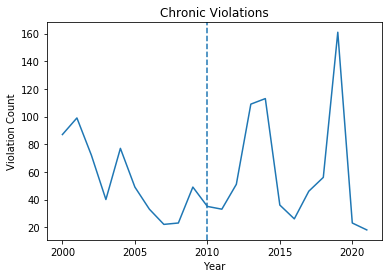

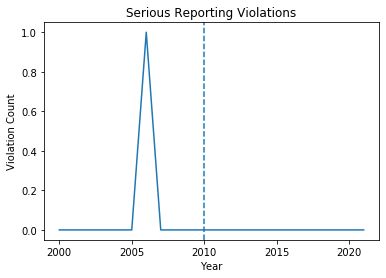

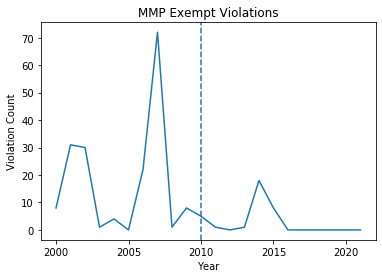

Region 4:


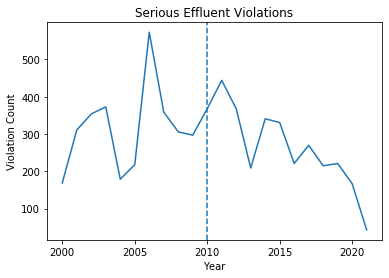

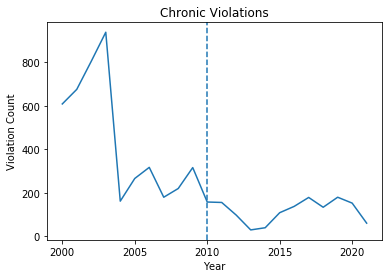

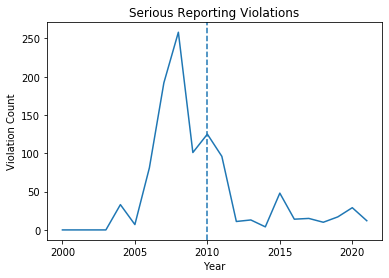

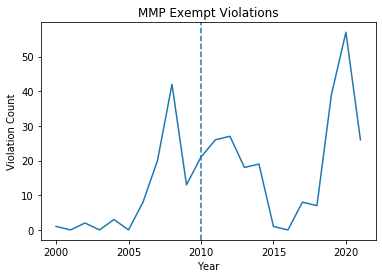

Region 5F:


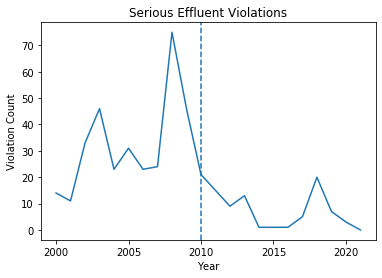

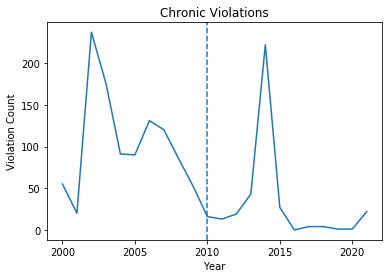

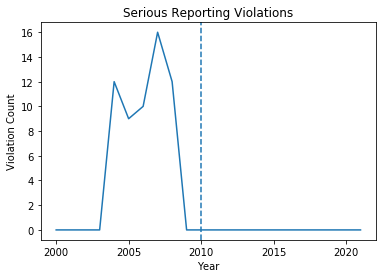

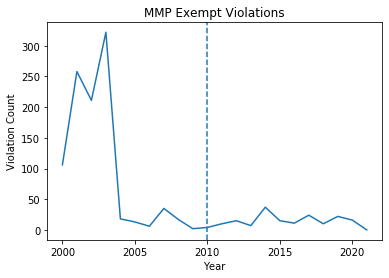

Region 5R:


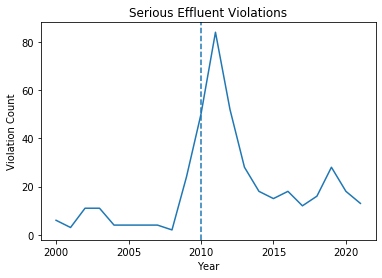

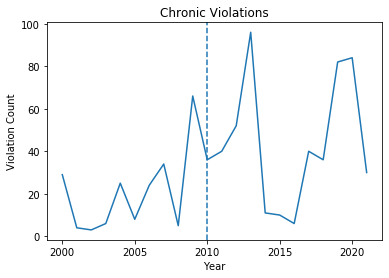

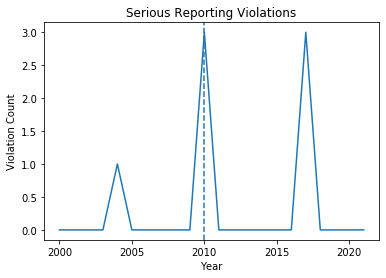

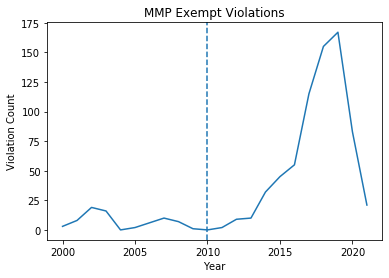

Region 5S:


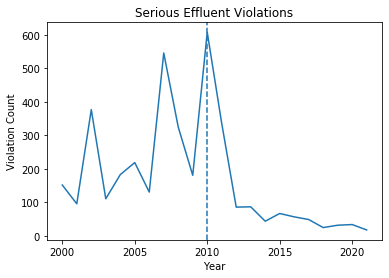

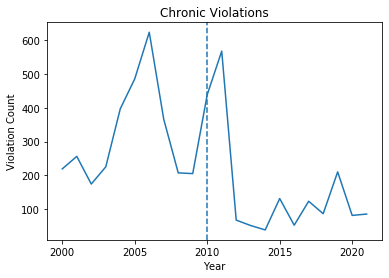

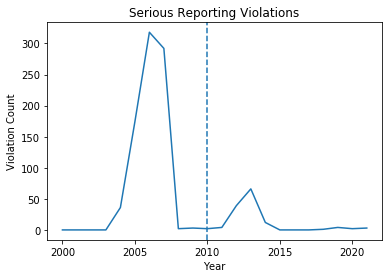

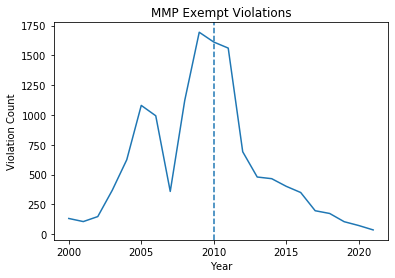

Region 6A:


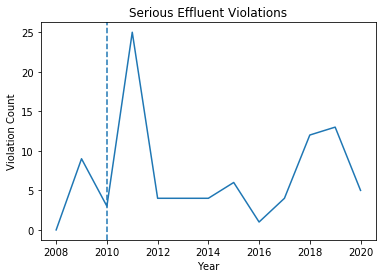

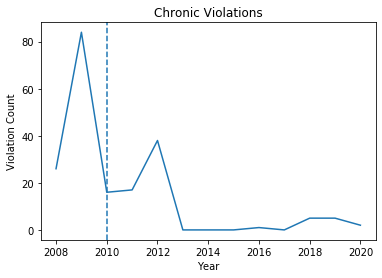

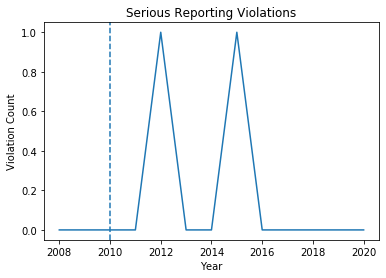

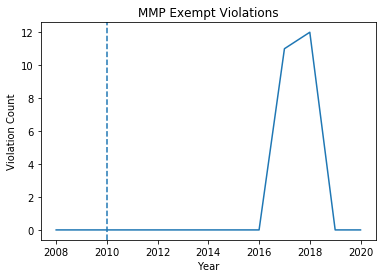

Region 6B:


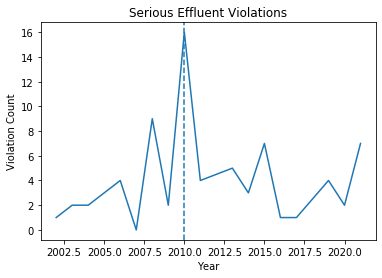

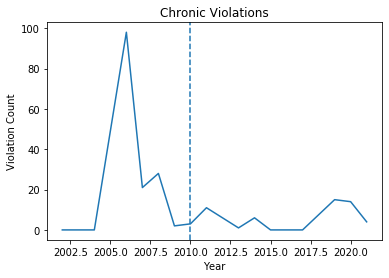

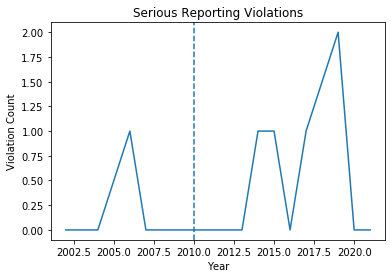

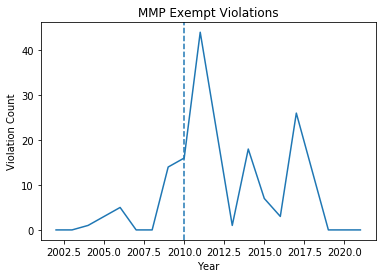

Region 7:


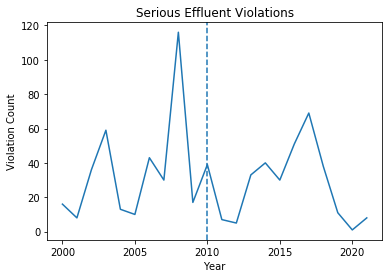

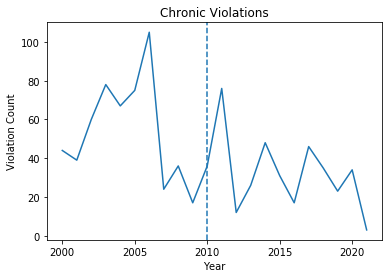

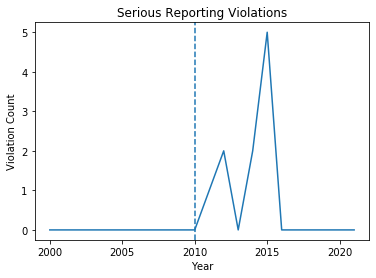

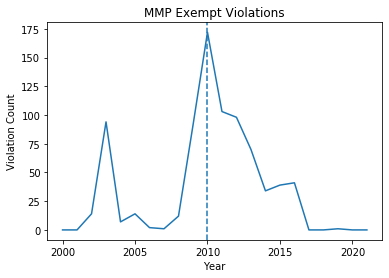

Region 8:


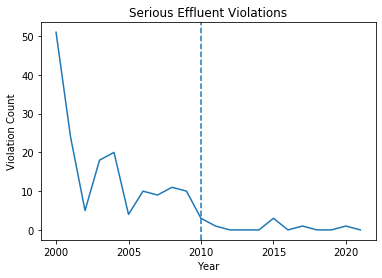

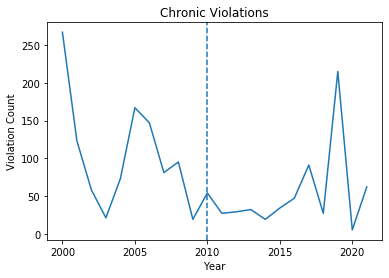

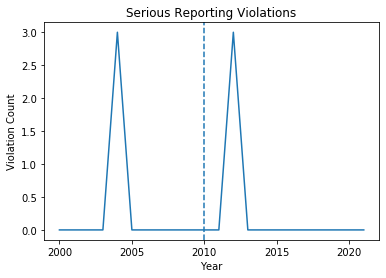

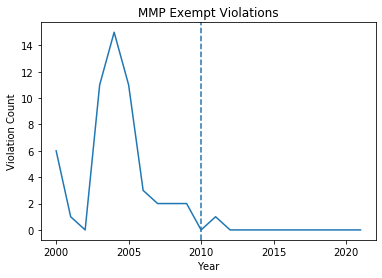

Region 9:


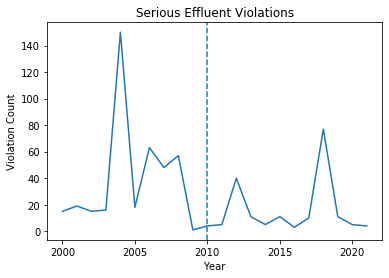

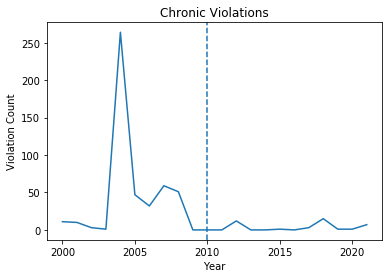

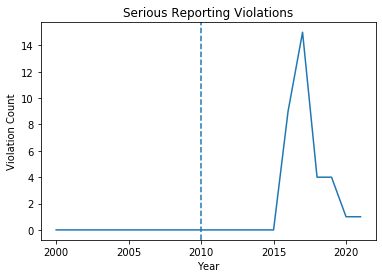

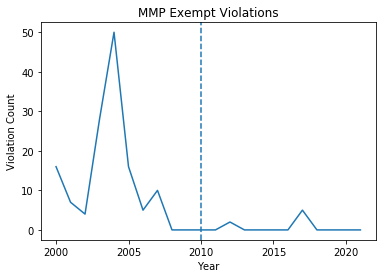

In [149]:
# plot violation counts by region
lst = ['Serious Effluent Violations', 'Chronic Violations', 'Serious Reporting Violations', 'MMP Exempt Violations']

print('As of 2010, the Water Boards had addressed 100% of backlogged MMPs.')

regions = totals.Region.unique().tolist()
for r in regions: 
    print(f'Region {r}:')
    r_totals = totals[totals['Region'] == r]
    for col in lst: 
        plot_count(r_totals, col)

Region 1:


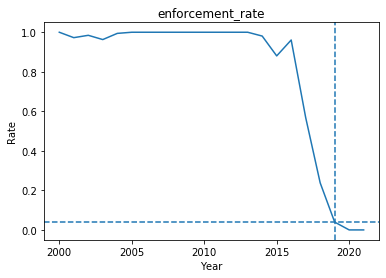

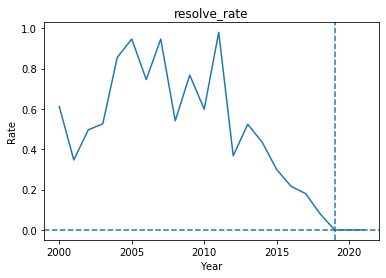

Region 2:


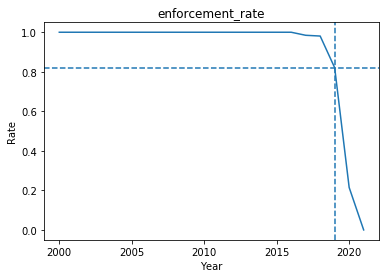

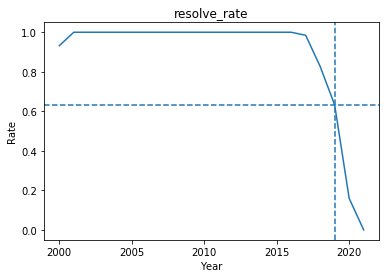

Region 3:


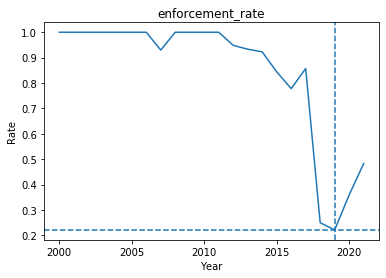

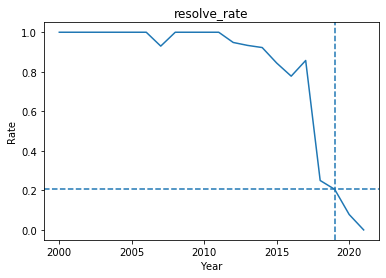

Region 4:


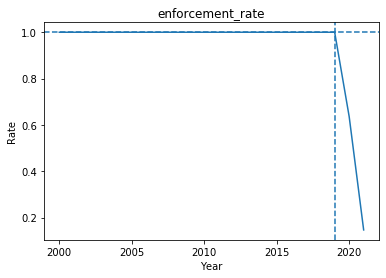

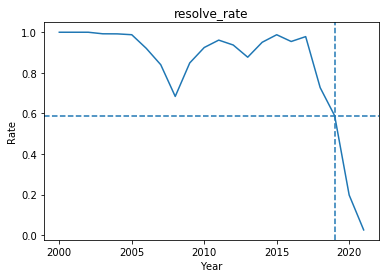

Region 5F:


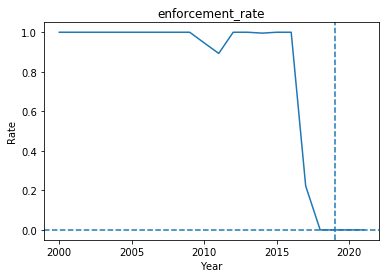

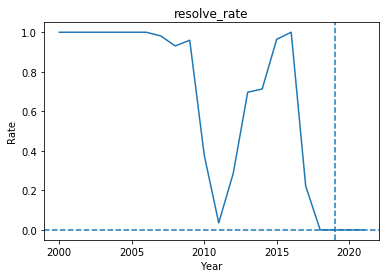

Region 5R:


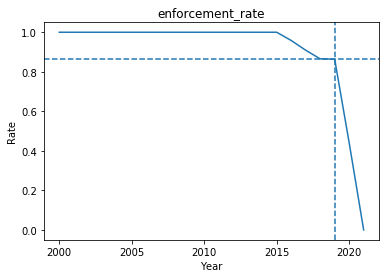

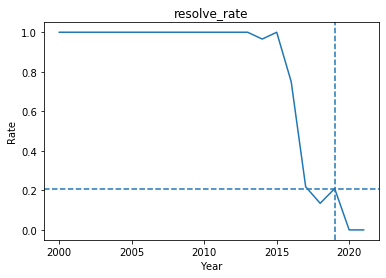

Region 5S:


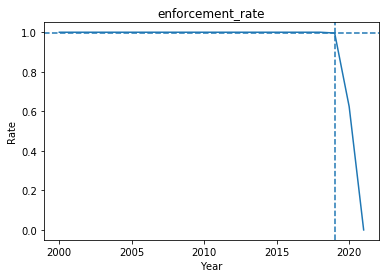

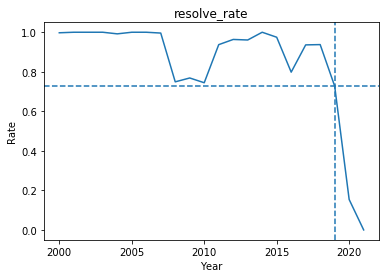

Region 6A:


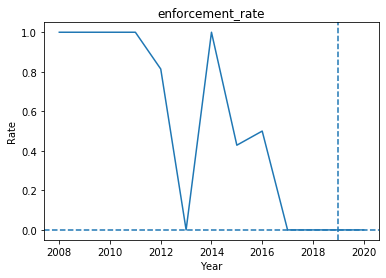

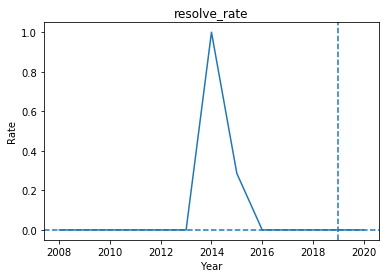

Region 6B:


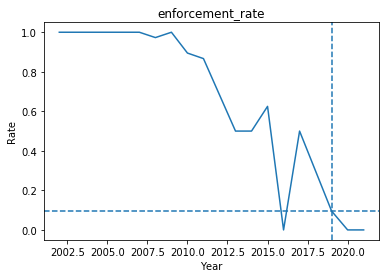

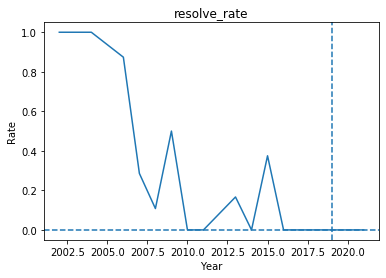

Region 7:


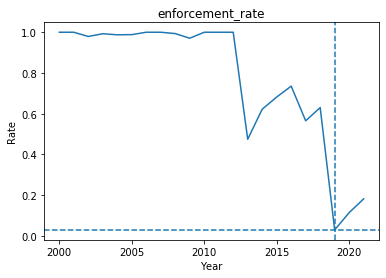

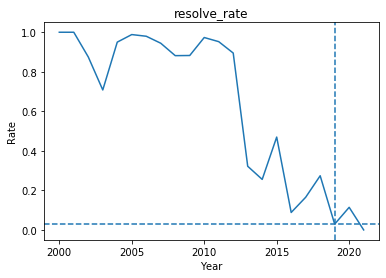

Region 8:


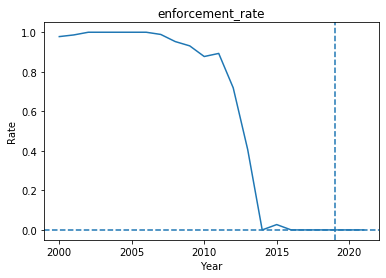

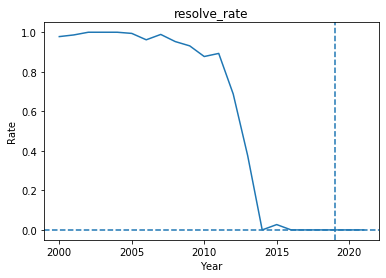

Region 9:


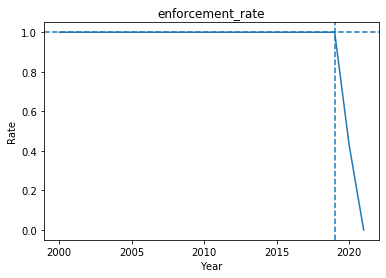

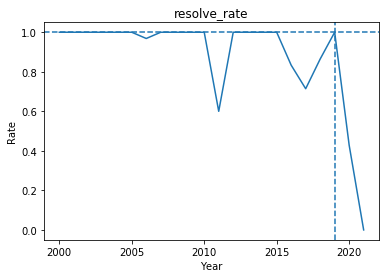

In [150]:
# plot enforcement rates by region
for r in regions: 
    print(f'Region {r}:')
    r_totals = totals[totals['Region'] == r]
    plot_rate(r_totals, 'enforcement_rate')
    plot_rate(r_totals, 'resolve_rate')

## Compliance rate of Major Wastewater Treatment Plants

- this is the focus of Water Boards as stated: https://www.waterboards.ca.gov/publications_forms/publications/2013_13385report/mmp/